<a href="https://colab.research.google.com/github/namanverma4321/Analystics-Based-Marketing/blob/main/Marketing_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining (IME672)
# Name: Naman Verma, Vanshika Kulkarni
# Roll No.: 21105051, 1907545

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Analytics based marketing/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Analytics based marketing





### 1:  Importing Libraries and load the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset=pd.read_excel("Dataset_Train.xlsx")

In [4]:
# shows count of rows and columns
dataset.shape

(22223, 11)

In [5]:
#shows first few rows of the code
dataset.head()

,ID,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,17147654,5.0,NaN,NaN,NaN,NaN,NaN,Tin,0.01,5.0,0
1,8415498,15.0,NaN,NaN,M,NaN,NaN,Gold,8000.00,5.0,1
2,12107603,NaN,NaN,NaN,M,Midlands,East,Tin,0.01,NaN,1
3,14400995,8.0,28.0,NaN,F,NaN,NaN,Tin,0.01,NaN,1
4,28724674,14.0,67.0,NaN,NaN,NaN,NaN,Tin,0.01,7.0,0


## Visualization for understanding Data

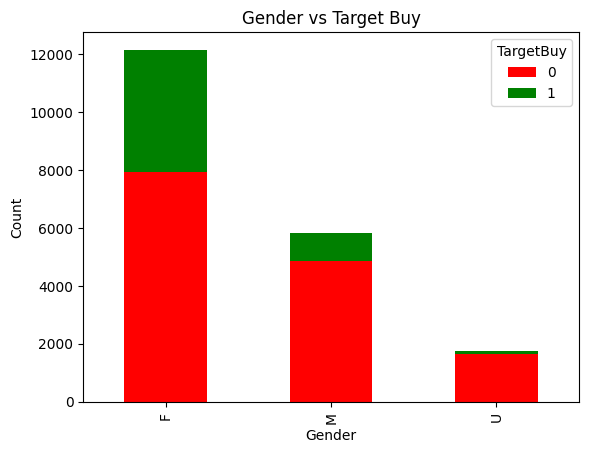

In [6]:
# Create a new DataFrame with counts of each gender/category combination
gender_counts = dataset.groupby(['DemGender', 'TargetBuy']).size().unstack()

# Plot the bar chart
ax = gender_counts.plot(kind='bar', stacked=True, color=['red', 'green'])
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Gender vs Target Buy')

plt.show()

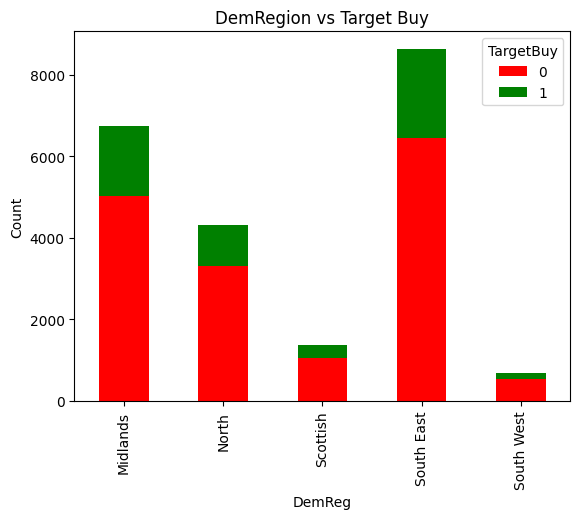

In [7]:
# Create a new DataFrame with counts of each gender/category combination
gender_counts = dataset.groupby(['DemReg', 'TargetBuy']).size().unstack()

# Plot the bar chart
ax = gender_counts.plot(kind='bar', stacked=True, color=['red', 'green'])
ax.set_xlabel('DemReg')
ax.set_ylabel('Count')
ax.set_title('DemRegion vs Target Buy')

plt.show()

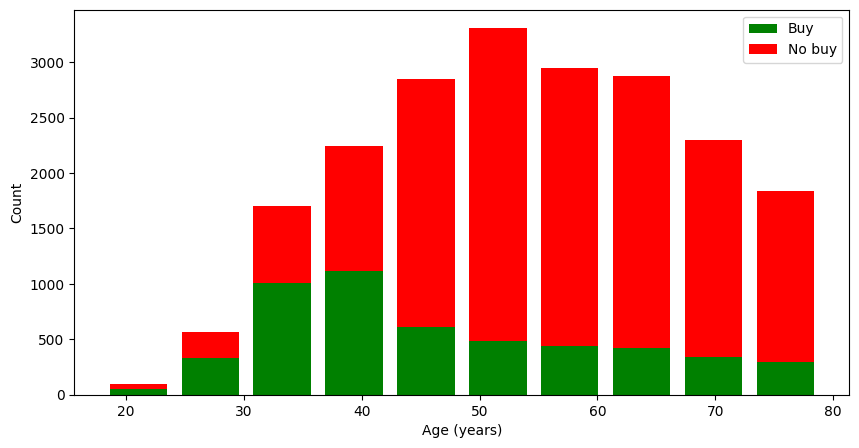

In [8]:
plt.figure(figsize=(10, 5))
plt.hist([dataset[dataset['TargetBuy'] == 1]['DemAge'], dataset[dataset['TargetBuy'] == 0]['DemAge']],
         color=['green', 'red'], label=['Buy', 'No buy'],stacked=True, rwidth=0.8)
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.legend()
plt.show()

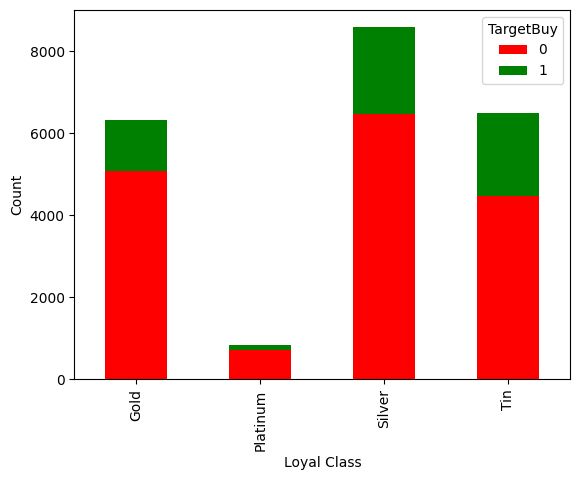

In [9]:
counts = dataset.groupby(['LoyalClass', 'TargetBuy']).size().unstack()

# Plot the stacked bar chart
counts.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.xlabel('Loyal Class')
plt.ylabel('Count')
plt.show()

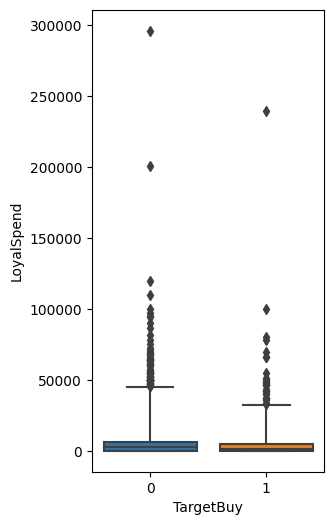

In [10]:
plt.figure(figsize=(3, 6))
sns.boxplot(x="TargetBuy", y="LoyalSpend", data=dataset,whis=(5, 99.5))
plt.xlabel("TargetBuy")
plt.ylabel("LoyalSpend")
plt.show()

In [11]:
# Calculate Q1 and Q3
Q1 = dataset['LoyalSpend'].quantile(0.05)
Q3 = dataset['LoyalSpend'].quantile(0.95)

# Identify outliers
outliers = dataset[(dataset['LoyalSpend'] < Q1) | (dataset['LoyalSpend'] > Q3)]
num_outliers = len(outliers)

# Remove outliers
dataset = dataset.drop(outliers.index)
# Print the number of outliers removed
print(f"Number of outliers: {num_outliers}")

Number of outliers: 1074


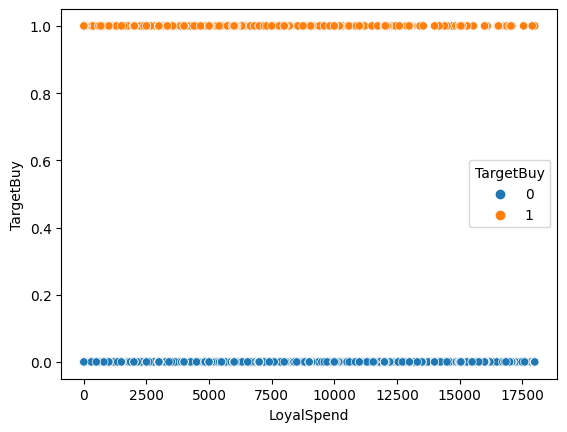

In [12]:
# create a scatter plot
sns.scatterplot(data=dataset, x="LoyalSpend", y="TargetBuy", hue="TargetBuy")

# set the axis labels
plt.xlabel("LoyalSpend")
plt.ylabel("TargetBuy")

# show the plot
plt.show()

### Data preparation

In [13]:
#dropping customer ID column from the dataset

dataset=dataset.drop(['ID'],axis=1)
dataset.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,NaN,NaN,NaN,NaN,NaN,Tin,0.01,5.0,0
1,15.0,NaN,NaN,M,NaN,NaN,Gold,8000.00,5.0,1
2,NaN,NaN,NaN,M,Midlands,East,Tin,0.01,NaN,1
3,8.0,28.0,NaN,F,NaN,NaN,Tin,0.01,NaN,1
4,14.0,67.0,NaN,NaN,NaN,NaN,Tin,0.01,7.0,0


In [14]:
# explore missing values

dataset.isna().sum()

DemAffl            1037
DemAge             1443
DemClusterGroup     645
DemGender          2386
DemReg              450
DemTVReg            450
LoyalClass            0
LoyalSpend            0
LoyalTime           269
TargetBuy             0
dtype: int64

In [15]:
# filling missing values with mean/mode
dataset['DemAffl']=dataset['DemAffl'].fillna(dataset['DemAffl'].mode()[0])
dataset['DemAge']=dataset['DemAge'].fillna(dataset['DemAge'].mode()[0])
dataset['DemClusterGroup']=dataset['DemClusterGroup'].fillna(dataset['DemClusterGroup'].mode()[0])
dataset['DemGender']=dataset['DemGender'].fillna(dataset['DemGender'].mode()[0])
dataset['DemReg']=dataset['DemReg'].fillna(dataset['DemReg'].mode()[0])
dataset['DemTVReg']=dataset['DemTVReg'].fillna(dataset['DemTVReg'].mode()[0])
dataset['LoyalTime']=dataset['LoyalTime'].fillna(dataset['LoyalTime'].mean())

In [16]:
# explore missing values post missing value fix

dataset.isna().sum()

DemAffl            0
DemAge             0
DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
LoyalClass         0
LoyalSpend         0
LoyalTime          0
TargetBuy          0
dtype: int64

In [17]:
dataset.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,51.0,C,F,South East,London,Tin,0.01,5.000000,0
1,15.0,51.0,C,M,South East,London,Gold,8000.00,5.000000,1
2,8.0,51.0,C,M,Midlands,East,Tin,0.01,6.538602,1
3,8.0,28.0,C,F,South East,London,Tin,0.01,6.538602,1
4,14.0,67.0,C,F,South East,London,Tin,0.01,7.000000,0


### Coverting category to numeric

In [18]:
# converting to mumeric

from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

dataset['DemClusterGroup'] = number.fit_transform(dataset['DemClusterGroup'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

dataset['DemGender'] = number.fit_transform(dataset['DemGender'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

dataset['DemReg'] = number.fit_transform(dataset['DemReg'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

dataset['DemTVReg'] = number.fit_transform(dataset['DemTVReg'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

dataset['LoyalClass'] = number.fit_transform(dataset['LoyalClass'].astype('str'))
integer_mapping = {l: i for i, l in enumerate(number.classes_)}
print(integer_mapping)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'U': 6}
{'F': 0, 'M': 1, 'U': 2}
{'Midlands': 0, 'North': 1, 'Scottish': 2, 'South East': 3, 'South West': 4}
{'Border': 0, 'C Scotland': 1, 'East': 2, 'London': 3, 'Midlands': 4, 'N East': 5, 'N Scot': 6, 'N West': 7, 'S & S East': 8, 'S West': 9, 'Ulster': 10, 'Wales & West': 11, 'Yorkshire': 12}
{'Gold': 0, 'Silver': 1, 'Tin': 2}


In [19]:
dataset.head()

,DemAffl,DemAge,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,51.0,2,0,3,3,2,0.01,5.000000,0
1,15.0,51.0,2,1,3,3,0,8000.00,5.000000,1
2,8.0,51.0,2,1,0,2,2,0.01,6.538602,1
3,8.0,28.0,2,0,3,3,2,0.01,6.538602,1
4,14.0,67.0,2,0,3,3,2,0.01,7.000000,0


### Checking for Multicollinearity

In [20]:
def calc_vif(z):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [21]:
z = dataset.iloc[:,0:9]
calc_vif(z)

,variables,VIF
0,DemAffl,6.422677
1,DemAge,12.920912
2,DemClusterGroup,3.734813
3,DemGender,1.434957
4,DemReg,2.494294
5,DemTVReg,3.780564
6,LoyalClass,6.238987
7,LoyalSpend,4.395729
8,LoyalTime,3.199993


In [22]:
dataset=dataset.drop(['DemAge'],axis=1)
dataset.head()

,DemAffl,DemClusterGroup,DemGender,DemReg,DemTVReg,LoyalClass,LoyalSpend,LoyalTime,TargetBuy
0,5.0,2,0,3,3,2,0.01,5.000000,0
1,15.0,2,1,3,3,0,8000.00,5.000000,1
2,8.0,2,1,0,2,2,0.01,6.538602,1
3,8.0,2,0,3,3,2,0.01,6.538602,1
4,14.0,2,0,3,3,2,0.01,7.000000,0


### Sampling Unbalanced data

0    15817
1     5332
Name: TargetBuy, dtype: int64


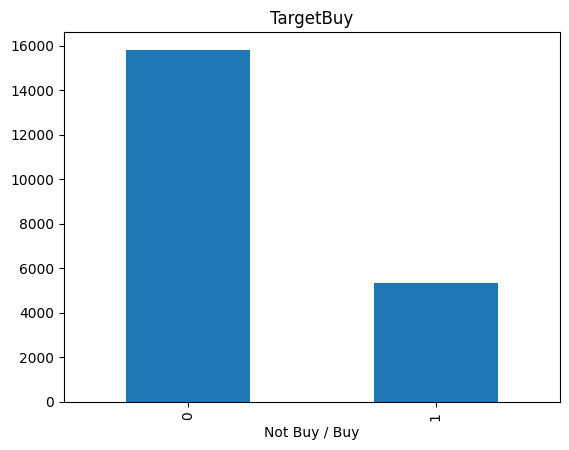

In [23]:
print(dataset['TargetBuy'].value_counts())
ax=dataset['TargetBuy'].value_counts().plot(kind='bar',title='TargetBuy')
ax.set_xlabel('Not Buy / Buy')
plt.show()

In [24]:
y = dataset.iloc[:, 8].values
X = dataset.iloc[:, 0:8].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
counter = Counter(y_train)
print('Before',counter)

# oversampling the train dataset using SMOTE

smote = SMOTE()
X_samp, y_samp = smote.fit_resample(X_train_scaled, y_train)

counter = Counter(y_samp)
print('After',counter)

Before Counter({0: 11055, 1: 3749})
After Counter({0: 11055, 1: 11055})


In [26]:
Counter(y_test)

Counter({0: 4762, 1: 1583})

# Data Visualisation

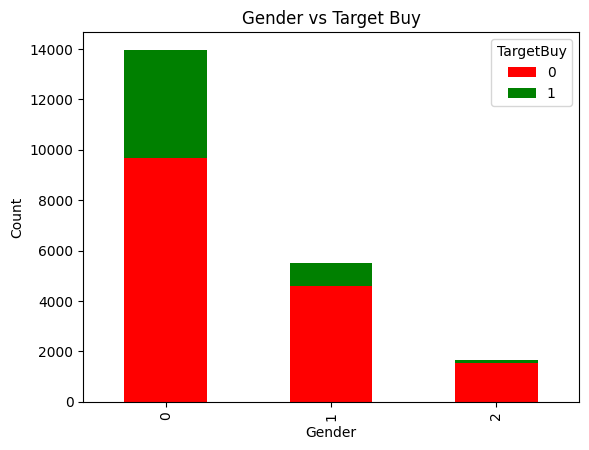

In [27]:
# Create a new DataFrame with counts of each gender/category combination
gender_counts = dataset.groupby(['DemGender', 'TargetBuy']).size().unstack()

# Plot the bar chart
ax = gender_counts.plot(kind='bar', stacked=True, color=['red', 'green'])
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Gender vs Target Buy')

plt.show()

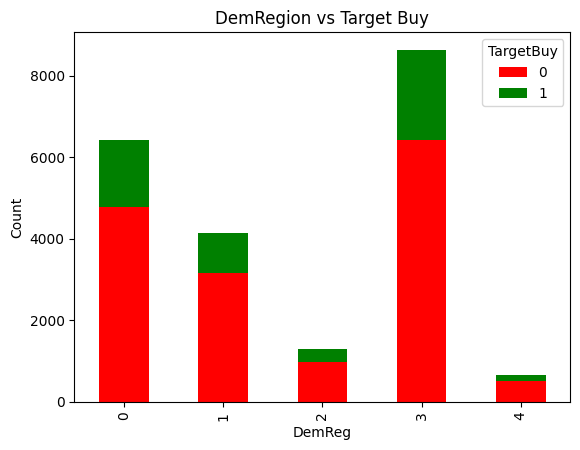

In [36]:
# Create a new DataFrame with counts of each gender/category combination
gender_counts = dataset.groupby(['DemReg', 'TargetBuy']).size().unstack()

# Plot the bar chart
ax = gender_counts.plot(kind='bar', stacked=True, color=['red', 'green'])
ax.set_xlabel('DemReg')
ax.set_ylabel('Count')
ax.set_title('DemRegion vs Target Buy')

plt.show()

### Modelling

In [29]:
classifier =  LogisticRegression(max_iter=300)
classifier.fit(X_samp, y_samp)
y_pred = classifier.predict(X_test_scaled)

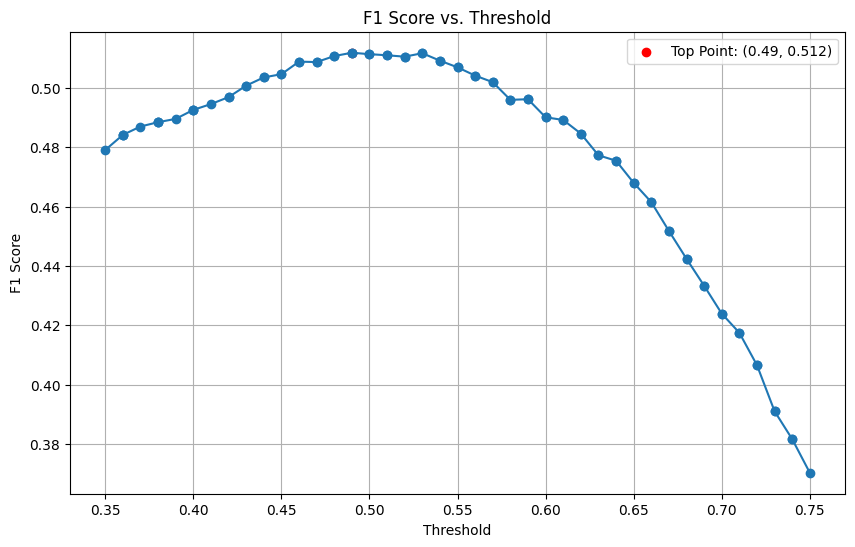

Top Point Coordinates: (0.49, 0.512)


In [30]:
from sklearn.metrics import f1_score
# Predict probabilities for the positive class (class 1)
y_pred_prob = classifier.predict_proba(X_test_scaled)[:, 1]

thresholds = [round(x, 2) for x in np.arange(0.35, 0.75, 0.005)]

# Initialize lists to store threshold values and corresponding F1 scores
threshold_values = []
f1_scores = []

# Iterate through the thresholds and calculate F1 scores
for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    threshold_values.append(threshold)
    f1_scores.append(f1_score(y_test, y_pred))
# Find the index of the maximum F1 score
max_f1_index = np.argmax(f1_scores)
top_threshold = threshold_values[max_f1_index]
top_f1_score = f1_scores[max_f1_index]

# Plotting the F1 score graph
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, f1_scores, marker='o')
plt.scatter(top_threshold, top_f1_score, color='red', label=f'Top Point: ({top_threshold}, {top_f1_score:.3f})')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Print the coordinates of the top point
print(f"Top Point Coordinates: ({top_threshold}, {top_f1_score:.3f})")

In [31]:
# # Exporting Logistic Regression Classifier to later use in prediction
# import joblib
# joblib.dump(classifier, 'Classifier_LoyalCustomers')

In [32]:
print(confusion_matrix(y_test,y_pred))

[[4545  217]
 [1174  409]]


In [33]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.79      0.95      0.87      4762
           1       0.65      0.26      0.37      1583

    accuracy                           0.78      6345
   macro avg       0.72      0.61      0.62      6345
weighted avg       0.76      0.78      0.74      6345



In [34]:
predictions = classifier.predict_proba(X_test)
predictions

array([[1.00000000e+000, 2.53110381e-234],
       [1.00000000e+000, 3.10149052e-288],
       [1.00000000e+000, 0.00000000e+000],
       ...,
       [1.67645465e-003, 9.98323545e-001],
       [1.00000000e+000, 1.49447977e-289],
       [1.00000000e+000, 1.29309870e-264]])

In [35]:
# writing model output file

df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])
df_x_test = pd.DataFrame(X_test)

dfx=pd.concat([df_x_test,df_test_dataset, df_prediction_prob], axis=1)
dfx.head(10)
# dfx.to_excel("ModelOutput_Train.xlsx")

,0,1,2,3,4,5,6,7,Actual Outcome,prob_0,prob_1
0,6.0,2.0,0.0,2.0,6.0,1.0,4884.25,12.0,0,1.000000,2.531104e-234
1,4.0,5.0,0.0,3.0,3.0,0.0,6000.00,6.0,0,1.000000,3.101491e-288
2,14.0,1.0,0.0,0.0,11.0,0.0,12000.00,11.0,1,1.000000,0.000000e+00
3,9.0,3.0,0.0,0.0,4.0,1.0,1000.00,6.0,1,1.000000,6.888111e-46
4,9.0,0.0,1.0,3.0,3.0,0.0,9981.46,4.0,0,1.000000,0.000000e+00
5,7.0,4.0,1.0,3.0,8.0,0.0,5281.51,19.0,0,1.000000,1.033077e-253
6,10.0,5.0,0.0,4.0,9.0,2.0,0.01,4.0,0,0.000302,9.996976e-01
7,7.0,1.0,0.0,4.0,9.0,2.0,0.01,8.0,0,0.009990,9.900103e-01
8,14.0,1.0,1.0,3.0,3.0,1.0,100.00,1.0,0,0.522029,4.779710e-01
9,7.0,0.0,0.0,3.0,3.0,2.0,0.01,8.0,0,0.008274,9.917265e-01
